In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools


from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau , EarlyStopping

sns.set(style='white',context='notebook',palette='deep')

In [ ]:
import PIL.Image
import os
from pylab import *
import re
from PIL import Image , ImageChops,ImageEnhance

In [ ]:
def get_imlist(path):
  return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.png')]

In [ ]:
def convert_to_ela_image(path,quality):
  filename = path
  resaved_filename = filename.split('.')[0] + '.resaved.jpg'
  ELA_filename = filename.split('.')[0] + '.ela.png'
  
  im = Image.open(filename).convert('RGB')
  im.save(resaved_filename,'JPEG',quality=quality)
  resaved_im = Image.open(resaved_filename)
  
  ela_im = ImageChops.difference(im,resaved_im)
  
  extrema = ela_im.getextrema()
  max_diff = max([ex[1] for ex in extrema])
  if max_diff == 0:
    max_diff = 1
    
  scale = 255.0/max_diff
  
  ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
  
  return ela_im

In [ ]:
from google.colab import files
import pandas as pd

In [ ]:
uploaded = files.upload()

NameError: ignored

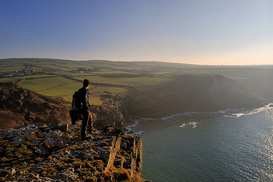

In [ ]:
Image.open('rom.jpg')  #morphed.  #morphed.jpg

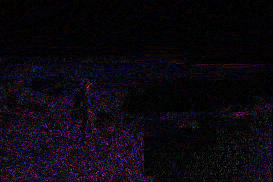

In [ ]:
convert_to_ela_image('rom.jpg', 90)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
path_orig = '/content/drive/My Drive/CASIA2/Au/'
path_modif = '/content/drive/My Drive/CASIA2/Tp/'

folder_orig = os.listdir()
folder_modif = os.listdir()

strings = []

for file in os.listdir(path_orig):
  try:
    if file.endswith('jpg'):
      if int(os.stat(path_orig + file).st_size) > 10000:
        line = path_orig + file + ',1\n'
        strings.append(line)
  except:
    print(path_orig+file)
    
for file in os.listdir(path_modif):
  try:
    if file.endswith('jpg'):
      if int(os.stat(path_modif + file).st_size) > 10000:
        line = path_modif + file + ',0\n'
        strings.append(line)
        
  except:
    print(path_modif+file)
    
for line in strings:
  with open('/content/drive/My Drive/CASIA2/dataset.csv','a') as f:
    f.write(line)
  

OSError: ignored

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/CASIA2/dataset.csv')

In [ ]:
X = []
Y = []

In [ ]:
for index, row in dataset.iterrows():
   X.append(array(convert_to_ela_image(row[0], 90).resize((128, 128))).flatten() / 255.0)
   Y.append(row[1])


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41487
  "Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41988
  "Skipping tag %s" % (size, len(data), tag))


In [ ]:
X = np.array(X)
Y = to_categorical(Y, 2)

In [ ]:
X = X.reshape(-1, 128, 128, 3)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [ ]:
model = Sequential()


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', 
                 activation ='relu', input_shape = (128,128,3)))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', 
                 activation ='relu'))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)


model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))


Instructions for updating:
Colocations handled automatically by placer.
Input:  (None, 128, 128, 3)
Output:  (None, 124, 124, 32)
Input:  (None, 128, 128, 3)
Output:  (None, 120, 120, 32)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Input:  (None, 128, 128, 3)
Output:  (None, 60, 60, 32)


In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 120, 120, 32)      25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 60, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               29491456  
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
__________

In [ ]:
optimizer = RMSprop(lr=0.0005, rho=0.9, epsilon=1e-08, decay=0.0)

In [ ]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

NameError: ignored

In [ ]:
early_stopping = EarlyStopping(monitor='val_acc',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='auto')

In [ ]:
epochs = 30
batch_size = 100

In [ ]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_val, Y_val), verbose = 2, callbacks=[early_stopping])

NameError: ignored

NameError: ignored

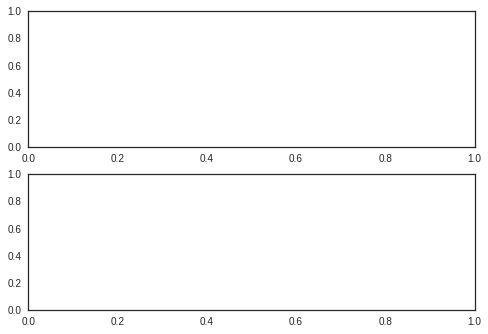

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)



ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  
  
  
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))
    

NameError: ignored